<a href="https://colab.research.google.com/github/yasego/HandsOnML/blob/main/hands_on_ml_ch8_dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**4. 매우 비선형적인 데이터셋의 차원을 축소하는데 PCA를 사용할 수 있을까요?**

PCA는 불필요한 차원을 제거할 수 있기 때문에 매우 비선형적이더라도 대부분의 데이터셋에서 차원을 축소하는데 사용할 수 있습니다. 그러나 불필요한 차원이 없다면(예를 들면 스위스 롤 데이터셋) PCA 차원 축소는 너무 많은 정보를 잃게 만듭니다. 즉, 스위스 롤은 펼처야하며 말려진 것을 뭉개면 안됩니다.



In [ ]:
#@title
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

(-12.0, 15.0)

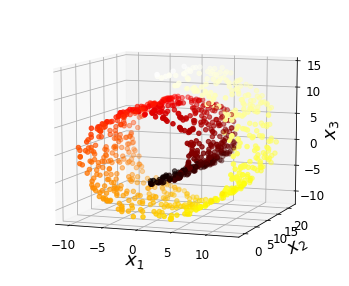

In [ ]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

In [ ]:
X.shape

(1000, 3)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [ ]:
pca.explained_variance_ratio_

array([0.40782396, 0.3020019 ])

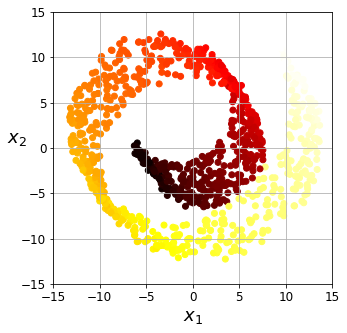

In [ ]:
fig = plt.figure(figsize=(5, 5))

plt.scatter(X2D[:, 0], X2D[:, 1], c=t, cmap=plt.cm.hot)
axes = [-15, 15, -15, 15]
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])


plt.grid(True)


**5. 설명된 분산을 95%로 지정한 PCA를 1,000개의 차원을 가진 데이터셋에 적용한다고 가정하겠습니다. 결과 데이터셋의 차원은 얼마나 될까요?**

이 질문에는 속임수가 있습니다. 답은 데이터셋에 따라 다릅니다. 극단적인 두 가지 사례를 살펴보겠습니다. 먼저 거의 완벽하게 일렬로 늘어선 데이터 포인트로 구성된 데이터셋을 생각해보겠습니다. 이 경우 PCA는 분산의 95%를 유지하면서 데이터셋을 단 하나의 차원으로 줄일 수 있습니다. 이번에는 완전히 무작위로 1,000개의 차원에 흩어져 있는 데이터 셋을 생각해보겠습니다. 이 경우 분산의 95%를 보존하려면 거의 950개의 차원이 필요할 것입니다. 그러므로 답은 데이터셋에 따라 달라지고 1에서 950 사이의 어떤 수도 될 수 있습니다. 차원 수에 대한 함수로 설명된 분산의 그래프를 그려보는 것이 데이터셋에 내재된 차원 수를 대략 가늠할 수 있는 한 가지 방법입니다. 


In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

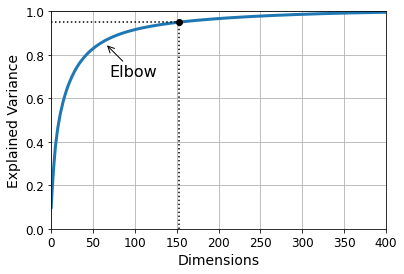

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

**6.기본 PCA, 점진적PCA, 랜덤PCA, 커널PCA는 어느 경우에 사용될까요?**

기본 PCA 가 우선적으로 사용되지만 데이터 셋 크기가 메모리에 맞을 때에 가능합니다. 점진적 PCA는 메모리에 담을 수 없는 대용량 데이터셋에 적합합니다. 하지만 기본 PCA보다 느리므로 데이터셋이 메모리 크기에 맞으면 기본 PCA를 사용해야 합니다. 점진적 PCA는 새로운 샘플이 발생될 때마다 실시간으로 PCA를 적용해야하는 온라인 작업에 사용 가능합니다. 랜덤 PCA는 데이터셋이 메모리 크기에 맞고 차원을 크게 축소시킬 때 사용됩니다. 이 경우에는 기본 PCA보다 훨씬 빠릅니다. 커널 PCA는 비선형 데이터셋에 유용합니다. 

랜덤 PCA : svd_solver 매개변수 'randomized'로 지정,  계산복잡도가 $O(m\times n^2) + O(n^3)  \rightarrow  O(m\times d^2) + O(d^3)$가 되기에 d가 n 보다 작으면 완전 svd보다 많이 빠름(n : 원래 차원,  d: 축소된 차원) 

점진적 PCA : 훈련세트를 미니매치로 나눈 뒤 점진적알고리즘에 한 번에 하나씩 주입. 사이킷런의 InrementalPCA 혹은 memmap 클래스 사용

In [ ]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="") # 책에는 없음
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

....................................................................................................

In [ ]:
filename = "my_mnist.data"
m, n = X_train.shape

X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m, n))
X_mm[:] = X_train

In [ ]:
del X_mm

In [ ]:
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

IncrementalPCA(batch_size=525, n_components=154)